# Corso di Probabilità e Statistica - Distribuzioni multivariate

In questo capitolo discutiamo delle distribuzioni multivariate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # Statistica
import seaborn as sns # Grafica avanzata 

Definiamo un set di coppie di numeri random Gaussiani:
$$ p(x,y) = \frac{1}{\sqrt{1-\rho^2}2\pi s_x s_y} \exp\left(-\frac{1}{2(1-\rho^2} \left(\frac{x^2}{s_x^2}+\frac{y^2}{s_y^2} -2\rho \frac{xy}{s_x s_y} \right)\right)$$

per cui i momenti sono
$$\langle x \rangle =\langle y \rangle=0$$ 
$$\langle x^2 \rangle =s_x^2$$ 
$$\langle y^2 \rangle =s_y^2$$ 
$$\langle xy \rangle =\rho s_x s_y$$

https://docs.scipy.org/doc//numpy-1.15.0/reference/generated/numpy.random.multivariate_normal.html

In [2]:
# definiamo medie e covarianza
mu = [0, 0] #medie nulle
rho=.5 #coefficiente di correlazione
sx=1
sy=2
cov = [[sx**2, rho*sx*sy], [rho*sx*sy, sy**2]] #matrice di covarianza
N=1000 #numero di punti

In [3]:
# generiamo N valori x,y 
x, y = np.random.multivariate_normal(mu, cov, N).T

In [4]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

**Scatter plot**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns # Grafica avanzata
import warnings
import math 
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 14})

[]

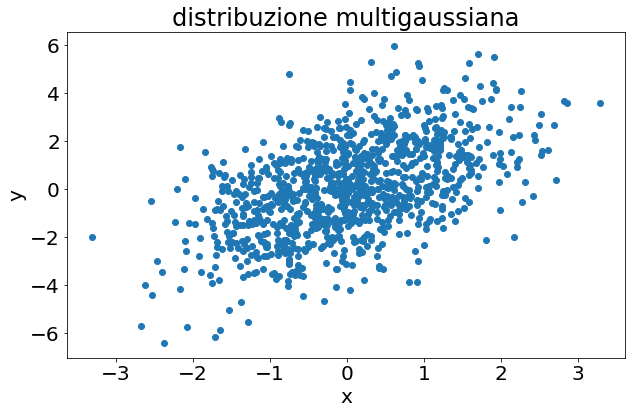

In [10]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("distribuzione multigaussiana")
plt.plot()

**Hexbin plot**

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html

Text(0, 0.5, 'Y')

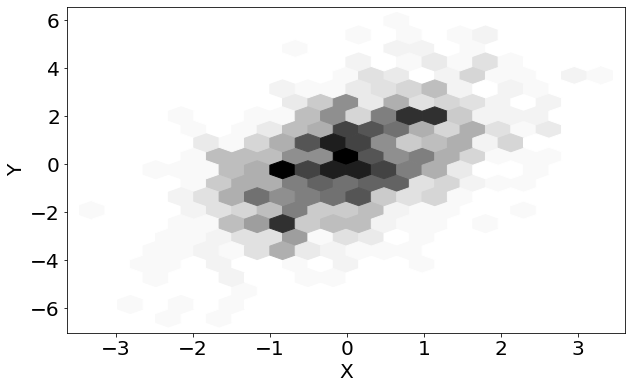

In [11]:
plt.hexbin(x, y,gridsize=20, cmap='Greys')
plt.xlabel('X')
plt.ylabel('Y')

**Contour plots**

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In questo modo posso plottare le linee equiprobabili

Text(0, 0.5, 'Y')

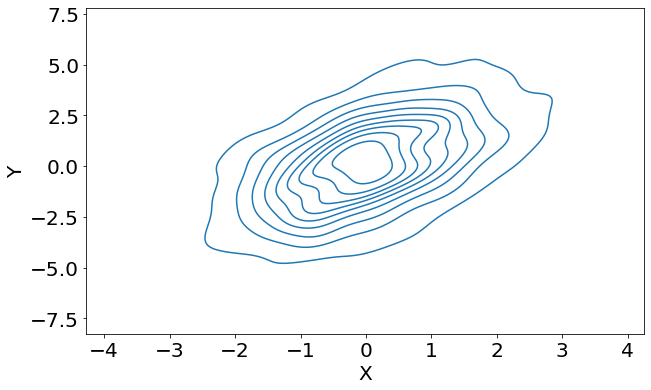

In [12]:
# contorni linee
ax=sns.kdeplot(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Semplicemente inserendo un secondo paramtero riempio le diverse zone a seconda della probabilità. In questo caso non ci sono linee.

Text(0, 0.5, 'Y')

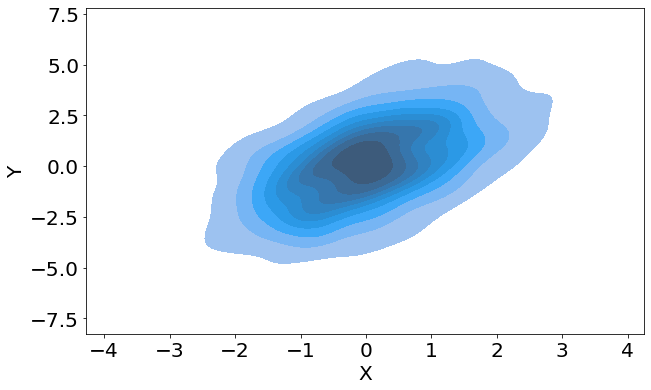

In [14]:
# contorni colori
ax=sns.kdeplot(x, y, shade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

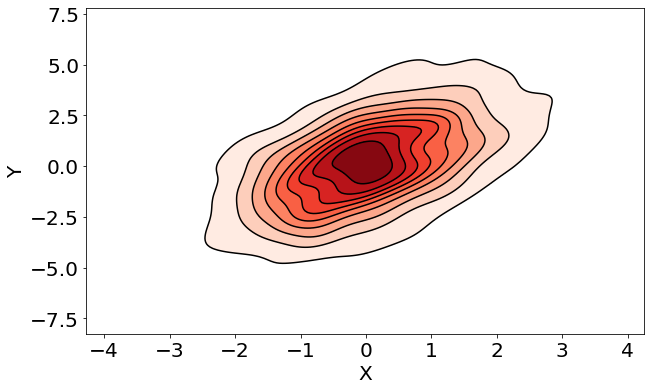

In [16]:
# linee e colori
ax=sns.kdeplot(x, y, shade="True", cmap="Reds")
# in questo caso per la variabile a cui assegnare il colori si usa una color map
sns.kdeplot(x,y, color="Black", ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

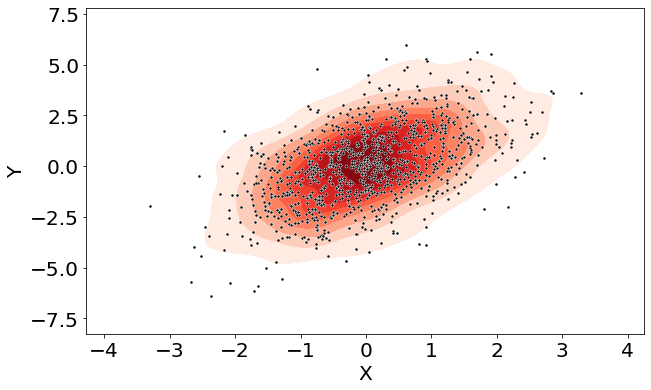

In [17]:
# punti e colori
ax=sns.kdeplot(x, y, shade="True", cmap="Reds")
sns.scatterplot(x,y, color="Black", marker=".",ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')

**nota**: scegliere i markers: https://matplotlib.org/3.3.1/api/markers_api.html

**Joint plots**

http://seaborn.pydata.org/generated/seaborn.jointplot.html

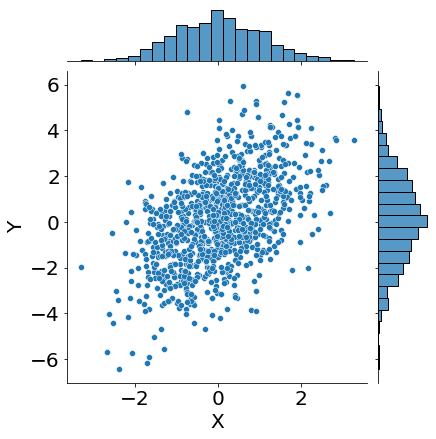

In [18]:
# scatter
ax=sns.jointplot(x, y)
ax.set_axis_labels("X","Y")


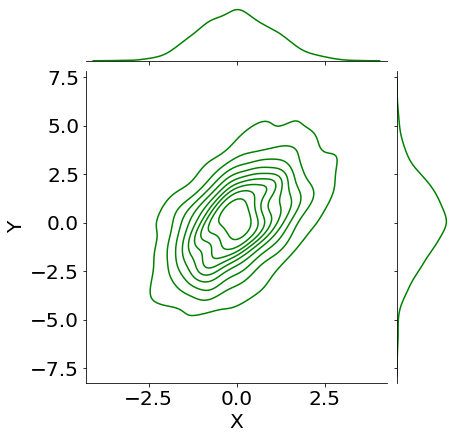

In [19]:
# con kde
ax=sns.jointplot(x, y , kind="kde", color="g")
ax.set_axis_labels("X","Y")

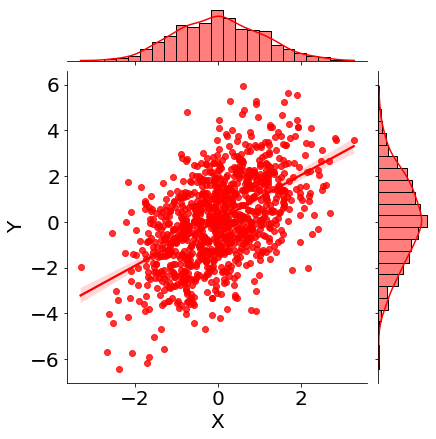

In [20]:
# con regressione
ax=sns.jointplot(x, y , kind="reg", color="r")
ax.set_axis_labels("X","Y")

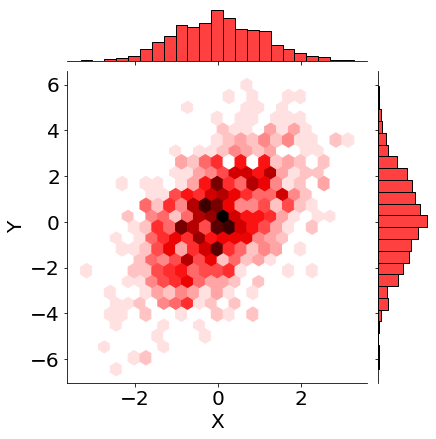

In [21]:
# con hexbin
ax=sns.jointplot(x, y , kind="hex", color="r")
ax.set_axis_labels("X","Y")

Dai grafici plottati fino a questo punto si può vedere a occhio che le variabili sono correlate perchè l'ellissoide è orientato di un angolo $\phi$ non nullo rispetto all'asse delle ascisse.
Quando due variabili non sono correlate gli assi dell'ellisse sono paralleli agli assi cartesiani.

**Esercizio**

- Generare delle variabili casuali $x,y$ correlate come nell'esercizio precedente. 

- Eseguire una trasformazione delle variabili in modo da renderle scorrelate $x' = x \cos \phi + y \sin \phi$ e $y'=-x \sin \phi + y\cos \phi$, dove $\tan 2\phi = 2\rho s_x s_y /(s_x^2-s_y^2)$.

- Verificare graficamente che nel piano $(x',y')$ la distribuzione e descritta da un ellissoide con gli assi paralleli agli assi cartesiani

Effettivamente dovrei notare una non correllazione: si tratta di una rotazione nel piano cartesiano esattamente dell'angolo $\phi$ che segnalava la correlazione nel grafico precedente.

**Genero le variabili x e y**

In [22]:
mu = [0, 0] #medie nulle
rho=.5 #coefficiente di correlazione
sx=1
sy=2
cov = [[sx**2, rho*sx*sy], [rho*sx*sy, sy**2]] #matrice di covarianza
N=1000 #numero di punti

In [23]:
x, y = np.random.multivariate_normal(mu, cov, N).T

In [25]:
phi = np.arctan((2*rho*sx*sy)/(sx*sx - sy*sy))/2
print(phi)

-0.29400130177378375


In [28]:
x1 = []
y1 = []

for i in range(N):
    x1.append(x[i]*np.cos(phi) + y[i]*np.sin(phi))
    y1.append(-x[i]*np.sin(phi)+ y[i]*np.cos(phi))

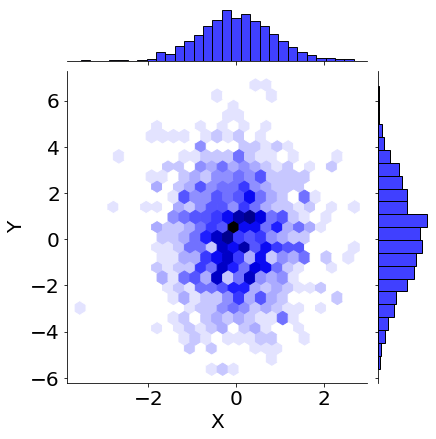

In [29]:
# con hexbin
ax=sns.jointplot(x1, y1, kind="hex", color="b")
ax.set_axis_labels("X","Y")